<a href="https://colab.research.google.com/github/HannanTechy/mean-reversion-using-python/blob/main/mean_reverse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [46]:
import yfinance as yf

# Define the stock symbol
symbol = "TATASTEEL.NS"

# Retrieve real-time data
data = yf.download(symbol, period="1d", interval="1m")

# Print the data
print(data)


[*********************100%%**********************]  1 of 1 completed
                                 Open        High         Low       Close  \
Datetime                                                                    
2023-09-04 09:15:00+05:30  129.649994  130.850006  129.649994  130.350006   
2023-09-04 09:16:00+05:30  130.149994  130.449997  129.899994  130.250000   
2023-09-04 09:17:00+05:30  130.250000  130.649994  130.000000  130.550003   
2023-09-04 09:18:00+05:30  130.500000  130.850006  130.300003  130.750000   
2023-09-04 09:19:00+05:30  130.699997  131.000000  130.649994  130.850006   
...                               ...         ...         ...         ...   
2023-09-04 15:25:00+05:30  131.850006  131.949997  131.800003  131.899994   
2023-09-04 15:26:00+05:30  131.899994  131.949997  131.850006  131.850006   
2023-09-04 15:27:00+05:30  131.899994  132.000000  131.850006  131.899994   
2023-09-04 15:28:00+05:30  132.000000  132.000000  131.800003  131.899994   
2023-09

In [47]:
# Compute rolling mean and standard deviation
window = 20
rolling_mean = data['Close'].rolling(window=window).mean()
rolling_std = data['Close'].rolling(window=window).std()


In [48]:
# Compute upper and lower bands
upper_band = rolling_mean + (2 * rolling_std)
lower_band = rolling_mean - (2 * rolling_std)



In [49]:
# Compute z-score
z_score = (data['Close'] - rolling_mean) / rolling_std
z_score

Datetime
2023-09-04 09:15:00+05:30         NaN
2023-09-04 09:16:00+05:30         NaN
2023-09-04 09:17:00+05:30         NaN
2023-09-04 09:18:00+05:30         NaN
2023-09-04 09:19:00+05:30         NaN
                               ...   
2023-09-04 15:25:00+05:30    2.095504
2023-09-04 15:26:00+05:30    1.338745
2023-09-04 15:27:00+05:30    1.658306
2023-09-04 15:28:00+05:30    1.515504
2023-09-04 15:29:00+05:30    1.395098
Name: Close, Length: 374, dtype: float64

In [50]:
# Generate buy signal when the price crosses below the lower Bollinger Band
data['buy_signal'] = (data['Close'] < lower_band).astype(int)

# Generate sell signal when the price crosses above the upper Bollinger Band
data['sell_signal'] = (data['Close'] > rolling_mean).astype(int)



In [51]:
starting_capital = 100000  # Starting capital
position_size = 100       # Number of shares per trade
transaction_cost_percentage = 0.0002     # Transaction cost per trade
capital = starting_capital
positions = 0
cumulative_pnl = 0

# Initialize signal flags
buy_signal = False

# Simulate trades and calculate profit/loss
for i in range(1, len(data)):
    # Calculate position size based on capital and risk management
    if buy_signal:
        positions = capital // (position_size * data['Open'][i])
        buy_signal = False  # Reset buy signal after execution
    else:
        positions = 0

    # Check if price crosses above the rolling mean (buy condition)
    if data['Close'][i] > lower_band[i] and positions == 0:
        buy_signal = True

    # Check if price reaches the upper Bollinger Band (sell condition)
    if data['Close'][i] >= upper_band[i] and positions > 0:
        sell_price = upper_band[i]  # Sell at upper Bollinger Band
        trade_value = sell_price * positions
        transaction_cost = trade_value * transaction_cost_percentage
        trade_pnl = (sell_price - data['Open'][i]) * positions - transaction_cost

        # Update capital and positions
        capital += trade_pnl
        cumulative_pnl += trade_pnl

In [8]:
"""
# Compute returns
data['returns'] = data['Close'].pct_change()

# Compute strategy returns
data['strategy_returns'] = data['returns'] * data['buy_signal'].shift(1) - data['returns'] * data['sell_signal'].shift(1)

# Compute cumulative returns
data['cumulative_returns'] = (1 + data['strategy_returns']).cumprod()


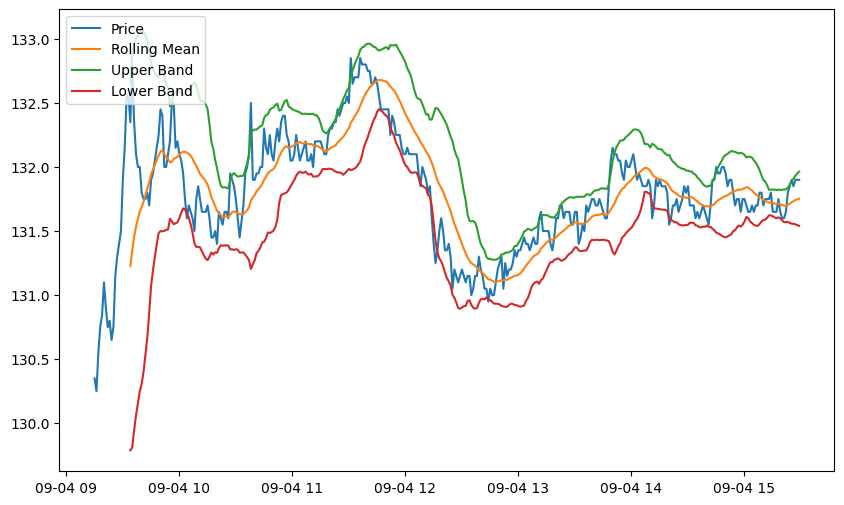

In [52]:
# Plot results
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(data['Close'], label='Price')
ax.plot(rolling_mean, label='Rolling Mean')
ax.plot(upper_band, label='Upper Band')
ax.plot(lower_band, label='Lower Band')
ax.legend(loc='upper left')
plt.show()

In [53]:
print(f"Net Profit/Loss: ${cumulative_pnl:.2f}")

Net Profit/Loss: $1.41
